# Convolution

This notebook explores the notion of convolution and image processing.

In [180]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from imageio import imread

## 1. Detection of directional gradients

We investigate the gradients present in a Sea Surface temperature field from a numerical simulation.

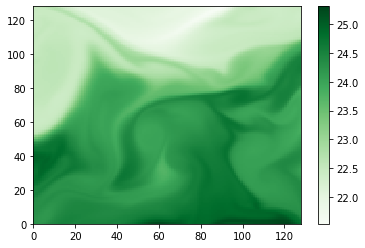

In [181]:
dirfile = "/Users/cosmee/data/eNATL60_SST_4ML/SST-images/"
filename = "sst1.npy"
sst1 = np.load(dirfile+filename)

plt.pcolormesh(sst1, cmap="Greens")
plt.colorbar()

### Convolution kernel

In [145]:
weights_gr = np.array( [ [ -1, -1, -1], [0, 0, 0], [1, 1, 1] ] )
weights_gr

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

### Convolution

Here the 'constant' mode is used with fill value equal to zero. This means that the array size conserved using a 0 padding.

In [182]:
sst1_1 = ndimage.convolve(sst1, weights_gr, mode = 'constant', cval = 0)
sst1_2 = ndimage.convolve(sst1, weights_gr.T, mode = 'constant', cval = 0)

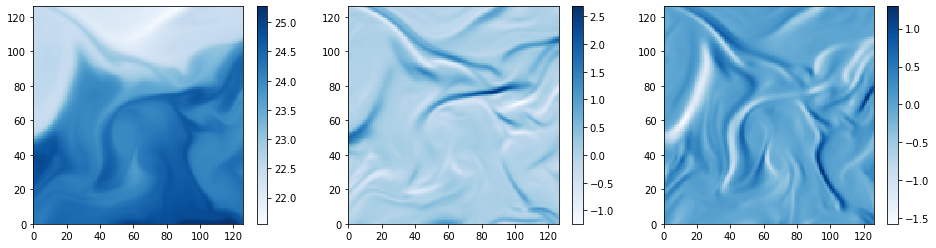

In [183]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.pcolormesh(sst1[1:-1,1:-1], cmap="Blues")
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(sst1_1[1:-1,1:-1], cmap="Blues")
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(sst1_2[1:-1,1:-1], cmap="Blues")
plt.colorbar()

## 2. Detection of contours

In [288]:
#weights_co =  np.array( [ [ 0, -1, 0], [-1, 4, -1], [0, -1, 0] ] )
weights_co =  np.array( [ [ -1, -1, -1], [-1, 8, -1], [-1, -1, -1] ] )
weights_co

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

### Loading an image

We download a random picture of sea ice.

In [289]:

#url = 'https://swot.jpl.nasa.gov/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBEdz09IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--117432df4ef53e7aad753b16e62e34e6f30ce7cc/swot_artist_eos_800.jpg?disposition=attachment'
url = 'https://media.nature.com/lw800/magazine-assets/d41586-020-02705-7/d41586-020-02705-7_18403698.jpg'
image = imread(url)

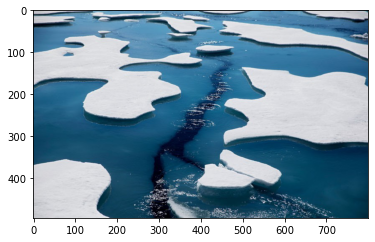

In [269]:
plt.imshow(image)

### Transform image into numpy array

In [290]:
ice = np.flip( np.asarray(image), axis = 0)/255.

In [291]:
ice.shape

(496, 800, 3)

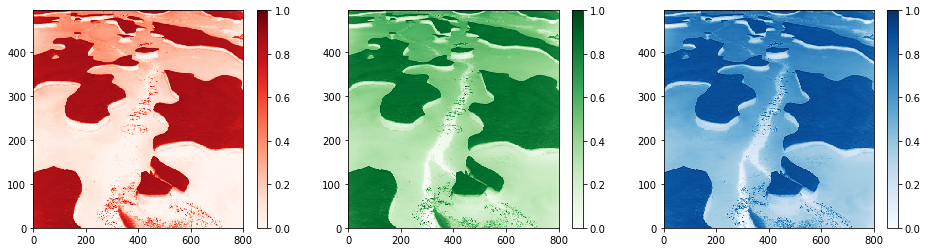

In [299]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.pcolormesh(ice[:,:,0], cmap="Reds")
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(ice[:,:,1], cmap="Greens")
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(ice[:,:,2], cmap="Blues")
plt.colorbar()

### Apply convolution

In [300]:
ice_0 = ndimage.convolve(ice[:,:,0], weights_co)
ice_1 = ndimage.convolve(ice[:,:,1], weights_co)
ice_2 = ndimage.convolve(ice[:,:,2], weights_co)

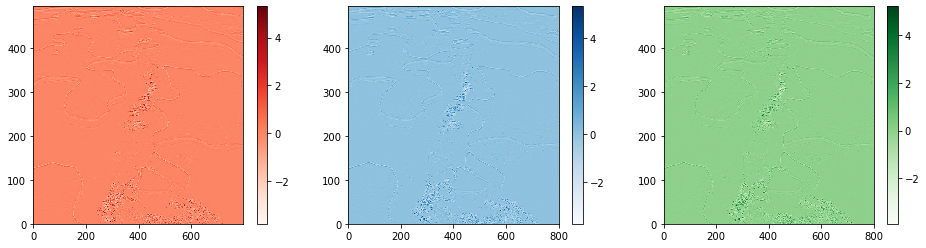

In [301]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.pcolormesh(ice_0[1:-1,1:-1], cmap="Reds")
plt.colorbar()
plt.subplot(132)
plt.pcolormesh(ice_1, cmap="Blues")
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(ice_2, cmap="Greens")
plt.colorbar()

### Oops

The resulting images seem extremely noisy. Perhaps we should remove small-scale noise in the original image.

In [199]:
#weights_fi = np.ones((3,3))/9
weights_fi = np.array( [[1, 2, 1], [2, 4, 2], [1, 2, 1]] )/16
weights_fi

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [328]:
sf = np.copy(ice[:,:,0])
for i in range(10):
    sf = ndimage.convolve(sf, weights_fi)

sf = ndimage.convolve(sf, weights_co)

# Binarization
step = 0.6
thres = step*np.max(sf) + (1-step)*np.min(sf)
sf = np.where(sf<thres, 0, sf)

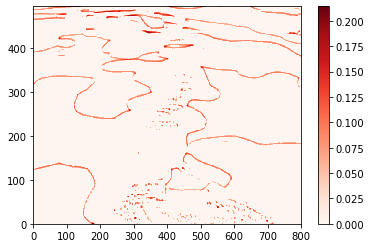

In [329]:
#plt.pcolormesh(sf, cmap="Reds")
plt.pcolormesh(sf, cmap="Reds")
plt.colorbar()